## Connecting mysql

In [4]:
import pymysql
import numpy as np
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
font = 'fantasy'

In [ ]:
def connect_mysql():
    print('[Connect Mysql]...')
    USER = input('  User: ')
    PASSWORD = input('  Password: ')
    config = {
        'host': '127.0.0.1',
        'port': 3306,
        'user': USER,
        'passwd': PASSWORD,
        'charset':'utf8mb4',
        'cursorclass':pymysql.cursors.DictCursor
        }
    conn = pymysql.connect(**config)
    conn.autocommit(1)
    cursor = conn.cursor()
    engine = create_engine('mysql+pymysql://%s:%s@127.0.0.1:3306/db_consumer_panel' % (USER, PASSWORD))
    return cursor, engine
cursor, engine = connect_mysql()

## Importing data into mysql

In [ ]:
## Importing dta_at_TC_upc data into table purchases
import time 
x = time.time()
loop = True
chunkSize = 900000
df = pd.read_csv('/Users/tjmask/Desktop/Courses/code of SQL/Bigdata_Final project/dta_at_TC_upc.csv', iterator=True)
while loop:
    try:
        chunk = df.get_chunk(chunkSize).drop(columns='Unnamed: 0')
        chunk.to_sql('purchases', engine, index=False, if_exists='append')
    except StopIteration:
        loop = False
        print ("Iteration is stopped.")
print("--- %s seconds ---" % (time.time() - x))

In [ ]:
## Importing dat_at_TC data into table trips
import time 
x = time.time()
loop = True
chunkSize = 900000
df = pd.read_csv('/Users/tjmask/Desktop/Courses/code of SQL/Bigdata_Final project/dta_at_TC.csv', iterator=True)
while loop:
    try:
        chunk = df.get_chunk(chunkSize).drop(columns='Unnamed: 0')
        chunk.to_sql('purchases', engine, index=False, if_exists='append')
    except StopIteration:
        loop = False
        print ("Iteration is stopped.")
print("--- %s seconds ---" % (time.time() - x))

In [ ]:
## Importing dat_at_prod_id data into table products
import time 
x = time.time()
loop = True
chunkSize = 900000
df = pd.read_csv('/Users/tjmask/Desktop/Courses/code of SQL/Bigdata_Final project/dta_at_TC.csv', iterator=True)
while loop:
    try:
        chunk = df.get_chunk(chunkSize).drop(columns='Unnamed: 0')
        chunk.to_sql('products', engine, index=False, if_exists='append')
    except StopIteration:
        loop = False
        print ("Iteration is stopped.")
print("--- %s seconds ---" % (time.time() - x))

# Plotting 

## a.ii. Plot the distribution of products per module and products per category

In [5]:
## connecting mysql
my_db = mysql.connector.connect(host="localhost", user='root',password='Wzy410179',db='db_consumer_panel',
                              ssl_disabled = True )
cursor = my_db.cursor()

In [12]:
## getting data of total number of products per department from mysql database with sql qurey
sql_query = "select department_at_prod_id as department, count(prod_id) as total_prod_per_department from dta_at_prod_id where department_at_prod_id is not null group by department_at_prod_id;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
myresult = mycursor.fetchall()
mycursor.close()
## rename the columns
myresult = pd.DataFrame(myresult)
myresult.columns =['department','total_prod_per_department']

### Drawing plot of 'total number of products per department'

In [ ]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.bar(myresult['department'], myresult['total_prod_per_department'],
       edgecolor = 'steelblue',  linewidth = 2, color = 'lightsteelblue', alpha = 0.7,
       label = 'Single Retailer', width = 0.5)
# Title, Label, Ticks and Ylim
ax.set_title('Total number of products per department', fontdict={'size':22})
ax.set_xticklabels(myresult['department'], rotation = 90,fontsize=12)
ax.set_ylabel('Number of products', fontsize = 16)
# Annotate Text
for a, b in enumerate(myresult.index):
    ax.text(a, myresult['total_prod_per_department'][b]+10000, myresult['total_prod_per_department'][b], horizontalalignment='center', fontsize = 10)
plt.show()

In [ ]:
## getting data from mysql database with sql qurey
sql_query = "select department_at_prod_id as department, count(distinct module_at_prod_id) as total_module_per_department from dta_at_prod_id where department_at_prod_id is not null group by department_at_prod_id;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
myresult = mycursor.fetchall()
mycursor.close()
## rename the columns
myresult = pd.DataFrame(myresult)
myresult.columns =['department','total_module_per_department']

### Drawing plot of 'total number of modules per department'

In [ ]:
# fig, ax =plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.bar(myresult['department'], myresult['total_module_per_department'],
       edgecolor = 'steelblue',  linewidth = 2, color = 'lightsteelblue', alpha = 0.7,
       label = 'Single Retailer', width = 0.5)
# Title, Label, Ticks and Ylim
ax.set_title('Total number of modules per department', fontdict={'size':22})
ax.set_xticklabels(myresult['department'], rotation = 90, fontsize=12)
ax.set_ylabel('Number of modules', fontsize = 16)
# Annotate Text
for a, b in enumerate(myresult.index):
    ax.text(a, myresult['total_module_per_department'][b]+3, myresult['total_module_per_department'][b], horizontalalignment='center', fontsize = 10)
plt.show()

### b.2.i Plot the race pie charts

In [ ]:
# Race
# Prepare data
count_race_single = single_retailer.groupby("hh_race",as_index = False)["hh_race"].agg({"counts": "count"})
count_race_two = two_retailer.groupby("hh_race",as_index = False)["hh_race"].agg({"counts": "count"})

# Draw Pie Chart
fig, ax = plt.subplots(ncols=2, figsize=(10,5), facecolor='white', dpi= 200)
ax1, ax2 = ax.ravel()

colors = ['lightblue','lightpink','lightgreen','gold']
labels = ['1: White Caucasian','2: African American','3: Asian','4: Others']

pie_1 = ax1.pie(count_race_single['counts'],textprops = {'fontsize':9, 'color':'k'},startangle=90,autopct='%1.1f%%',radius=2.5,pctdistance = 0.9,colors=colors, labels=labels)
pie_2 = ax1.pie(count_race_two['counts'],textprops = {'fontsize':9, 'color':'k'},startangle=90,autopct='%1.1f%%',radius=1.7,pctdistance = 0.9,colors=colors)
# Set wedge line between two pies
for pie_wedge in pie_1[0]:
    pie_wedge.set_edgecolor('white')
for pie_wedge in pie_2[0]:
    pie_wedge.set_edgecolor('white')
# Title, Label, Ticks  
ax1.set(aspect="equal")
ax1.set_title('Race Distribution', fontsize=20, y=1.7)
# ax2 only shows legend
ax2.axis('off')
ax2.legend(pie_1[0],labels, loc='center left',fontsize=13)

plt.show()

In [ ]:
# Is Latinx
# Prepare data
count_islatinx_single = single_retailer.groupby("hh_is_latinx",as_index = False)["hh_is_latinx"].agg({"counts": "count"})
count_islatinx_two = two_retailer.groupby("hh_is_latinx",as_index = False)["hh_is_latinx"].agg({"counts": "count"})

# Draw Pie Chart
fig, ax = plt.subplots(ncols=2, figsize=(6,6), facecolor='white', dpi= 200)
ax1, ax2 = ax.ravel()

colors = ['lightgreen','lightblue'] #'lightgreen','gold'
labels = ['1: Is Latinx','2: Not Latinx']

pie_1 = ax1.pie(count_islatinx_single['counts'],textprops = {'fontsize':13, 'color':'k'},startangle=90,autopct='%1.1f%%',radius=3,pctdistance = 0.9,colors=colors, labels=labels)
pie_2 = ax1.pie(count_islatinx_two['counts'],textprops = {'fontsize':13, 'color':'k'},startangle=90,autopct='%1.1f%%',radius=2,pctdistance = 0.7,colors=colors)
# Set wedge line between two pies
for pie_wedge in pie_1[0]:
    pie_wedge.set_edgecolor('white')
for pie_wedge in pie_2[0]:
    pie_wedge.set_edgecolor('white')
# Title, Label, Ticks  
ax1.set(aspect="equal")
ax1.set_title('Latinx Percentage', fontsize=20, y=2)
# ax2 only shows legend
ax2.axis('off')
ax2.legend(pie_1[0],labels, loc='center left',fontsize=13)

plt.show()

### b.2.i. Plot the households size

In [ ]:
## Household Size

# Prepare data
count_hhsize_single = single_retailer.groupby("hh_size",as_index = False)["hh_size"].agg({"counts": "count"})
count_hhsize_two = two_retailer.groupby("hh_size",as_index = False)["hh_size"].agg({"counts": "count"})

merge = pd.merge(count_hhsize_single, count_hhsize_two, how='right', on = 'hh_size')
for i in merge.index:
    if math.isnan(merge['counts_x'][i]):
        merge['counts_x'][i] = 0  
merge.columns = ['hh_size','count_for_single','count_for_two']

name_list = list(merge['hh_size'])
merge['count_for_single'] = merge['count_for_single'].astype(int)
num_list1 = list(merge['count_for_single'])
num_list2 = list(merge['count_for_two'])

x =np.arange(len(num_list1))
total_width, n = 0.7, 2
width = total_width / n
# Drawing plot
plt.subplots(figsize=(10,10), facecolor='white', dpi= 100)
plt.bar(x, num_list1, width=width, label='single retailer',fc = 'steelblue',alpha=0.6)
plt.bar(x+width, num_list2, width=width, label='two retailers',fc = 'orange',alpha=0.6)
# Title, Label, Ticks  
plt.title('Household Size Distribution',fontsize=20,y=1.05)
plt.xlabel('Household Size',fontsize=13)
plt.ylabel('Number of Households',fontsize=13)
plt.xticks(x+width/2, name_list)
plt.legend(fontsize=13)
for a, b in enumerate(merge.index):
    plt.text(a, merge['count_for_single'][b]+2, merge['count_for_single'][b], horizontalalignment='center',fontsize = 13,c='darkblue')
    plt.text(a+0.3, merge['count_for_two'][b]+2, merge['count_for_two'][b], horizontalalignment='center',fontsize = 13, c='darkorange')

plt.show()

### b.2.i. Plot the income distribution

In [ ]:
# Are these people richer? Poorer?

# Drawing plot
f, ax= plt.subplots(figsize = (14, 10),dpi=100)
ax = sns.kdeplot(single_retailer['hh_income'], cut=3,label='single retailer',color='r')
sns.kdeplot(two_retailer['hh_income'], cut=3,label='two retailer',color='purple')
sns.kdeplot(dta_at_hh['hh_income'], cut=3,label='all households',color='gold')
# Title, Label, Ticks  
ax.set_title('Distribution of Income',fontsize=20)
ax.set_xlabel('Income',fontsize=16)
ax.set(xlim=(3,27))
ax.set_ylabel('Probability',fontsize=16)
ax.tick_params(labelsize=15)
plt.show()

### b.2.iii. Plot the distribution by state 

In [ ]:
# Prepare data
single_retailer = pd.read_csv('single_retailer.csv')
states_n = Counter(single_retailer['hh_state'])
states_count = pd.DataFrame.from_dict(states_n, orient='index').reset_index()
states_count.columns = ['state','count']
states_count.sort_values('count', ascending = False, inplace = True)

# Prepare data
two_retailer = pd.read_csv('two_retailer.csv')
states_n_2 = Counter(two_retailer['hh_state'])
states_count_2 = pd.DataFrame.from_dict(states_n_2, orient='index').reset_index()
states_count_2.columns = ['state','count']
states_count_2.sort_values('count', ascending = False, inplace = True)

merge = pd.merge(states_count_2, states_count, how='left', on = 'state')
for i in merge.index:
    if math.isnan(merge['count_y'][i]):
        merge['count_y'][i] = 0
        

# Drawing plot
x = np.arange(38)
width = 0.85
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.bar(x, merge['count_x'],
         linewidth = 1, color = 'steelblue', alpha = 0.6,
       label = 'Two Retailers', width = width)
ax.bar(x, -merge['count_y'], 
       linewidth = 1, color = 'orange', alpha = 0.6,
       label = 'Single Retailer', width = width)
# Title, Label, Ticks and Ylim
ax.set_title('Distribution of households by state', fontdict={'size':22})
ax.set_ylabel('Number of Households', fontsize = 16)
ax.set_xlabel('States', fontsize =16)
#ax.set(ylim=(0,30))
plt.xticks(x+width/2, merge['state'])
plt.yticks(fontsize=12)

# Annotate Text
for a, b in enumerate(merge.index):
    ax.text(a, merge['count_x'][b]+0.2, merge['count_x'][b], horizontalalignment='center', fontsize = 11)
    ax.text(a, -merge['count_y'][b]-1, int(merge['count_y'][b]), horizontalalignment='center', fontsize = 11)
    
plt.legend(fontsize = 16, framealpha = 0)
plt.show()

### b.3.i Average number of items purchased on a given month.

In [ ]:
avg_items = pd.read_csv('b3_i.csv', dtype = {'monthly' : str})
avg_items.sort_values(by = "monthly", inplace = True)
for index in list(avg_items.index):
    str_1=avg_items['monthly'][index]
    str_list=list(str_1)
    str_list.insert(4,'/')
    avg_items['monthly'][index]="".join(str_list)

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.plot(avg_items["monthly"], avg_items["avg_items"],
        marker = 'o', markersize = 15, linewidth=3, color = 'steelblue')
    
# Title, Label, Ticks 
ax.set_title('Average number of items purchased per month', fontdict={'size':22})
ax.set_xlabel("Months", fontsize = 16)
ax.set_ylabel("Average number of items purchased", fontsize = 16)
ax.set_xticklabels(avg_items["monthly"], fontsize = 12)
ax.set(ylim=(0,150))
plt.yticks(fontsize=12)


# Annotate Text
for a, b in enumerate(avg_items.index):
    ax.text(a, avg_items['avg_items'][b]+5, round(avg_items['avg_items'][b],1), horizontalalignment='center', fontsize =11)
    
ax.annotate("Only 3 days in this month", fontsize = 15, fontname = font,
                xy = ('2003/12', 22.9), 
                xytext = ('2004/01', 40), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})
ax.annotate("Xmas: stores closed", fontsize = 15, fontname = font,
                xy = ('2004/12', 105), 
                xytext = ('2004/09', 80), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})
ax.annotate("After Xmas: stores reopened", fontsize = 15, fontname = font,
                xy = ('2004/01', 127.2), 
                xytext = ('2004/01', 90), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})
plt.show()

### b.3.ii Average number of shopping trips per month.

In [ ]:
avg_trips = pd.read_csv("b3_ii.csv", dtype = {'monthly' : str})
avg_trips.sort_values(by = "monthly", inplace = True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 300)
ax.plot(avg_trips["monthly"], avg_trips["avg_trips"],marker = 'o', markersize = 15, 
        linewidth = 3, color = 'steelblue')

# Title, Label, Ticks 
ax.set_title('Average number of shopping trips per month', fontdict={'size':22})
ax.set_xlabel("Months", fontsize = 16)
ax.set_ylabel("Average number of shopping trips", fontsize = 16)
ax.set_xticklabels(avg_items["monthly"], fontsize = 12)
ax.set(ylim=(0,20))
plt.yticks(fontsize=12)

# Annotate Text
ax.annotate("Only 3 days in this month", fontsize = 15, fontname = font,
                xy = ('2003/12', 3.2), 
                xytext = ('2004/02', 5 ), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})

for a, b in enumerate(avg_trips.index):
    ax.text(a, avg_trips['avg_trips'][b]+0.5, round(avg_trips['avg_trips'][b],1), horizontalalignment='center', fontsize =11)

plt.show()

### b.3.iii Average number of days between 2 consecutive shopping trips.

In [ ]:
avg_gap = pd.read_csv("b3_iii.csv", dtype = {'monthly' : str})
avg_gap.sort_values(by = "monthly", inplace = True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.plot(avg_gap["monthly"], avg_gap["avg_gap"], marker = 'o', markersize = 15, 
        linewidth = 3, color = 'steelblue')

# Title, Label, Ticks 
ax.set_title('Average number of days between 2 consecutive shopping trips per month', fontdict={'size':22})
ax.set_xlabel("Months", fontsize = 16)
ax.set_ylabel("Average number of days between 2 consecutive shopping trips", fontsize = 16)
ax.set_xticklabels(avg_items["monthly"], fontsize = 12)
ax.set(ylim=(0,3.5))
plt.yticks(fontsize=12)


# Annotate Text
ax.annotate("Only 3 days in this month", fontsize = 15, fontname = font,
                xy = ('2003/12', 1.4), 
                xytext = ('2004/02', 0.5 ), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})

for a, b in enumerate(avg_gap.index):
    ax.text(a, avg_gap['avg_gap'][b]+0.1, round(avg_gap['avg_gap'][b],1), horizontalalignment='center', fontsize =11)
plt.show()

## C.1 Is the number of shopping trips per month correlated with the average number of items purchased?

In [6]:
## Prepare data
import pandas as pd
purchase = pd.read_csv('/Users/joy/文件/Brandeis/2019Fall/Big Data 1/Final Project/dta_at_TC_upc.csv')
purchase_new = purchase[['TC_id','quantity_at_TC_prod_id']]
purchase_new.head()

trip = pd.read_csv('/Users/joy/文件/Brandeis/2019Fall/Big Data 1/Final Project/dta_at_TC.csv')
trip_new = trip[['hh_id', 'TC_id','TC_date']]
trip_new.head()

purchase_trip = pd.merge(purchase_new, trip_new, how='left', on ='TC_id')
df = purchase_trip.groupby(['hh_id', 'TC_id']).sum()
avg_purchase = df.groupby('hh_id').mean().round(0)
avg_purchase.head()

## Getting data from mysql database with sql qurey
sql_query = "with t1 as (select hh_id, TC_id, concat(year(TC_date), date_format(TC_date,'%m')) as monthly_date from dta_at_TC),t2 as (select hh_id, monthly_date, count(TC_id) as count1 from t1 group by hh_id, monthly_date order by hh_id) select hh_id, avg(count1) as avg_trips from t2 group by hh_id;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
avg_trips = mycursor.fetchall()
mycursor.close()

avg_trips = pd.DataFrame(avg_trips)
avg_trips.columns = ['hh_id','avg_trips']
avg_trips.head()


,hh_id,avg_trips
0,2000000,12.1538
1,2000021,18.0000
2,2000038,21.3846
3,2000049,20.3846
4,2000076,13.3333


### Draw the plot of 'Avg(# of trips per month) - Avg(# of items purchased per trip)'

In [ ]:
import matplotlib.pyplot as plt

# cm = plt.cm.get_cmap('PuBu')

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.scatter(avg_purchase["quantity_at_TC_prod_id"], avg_trips["avg_trips"], 
           s = 60, alpha = 0.3)
# c = avg_purchase["quantity_at_TC_prod_id"], cmap = cm)

# Title, Label, Ticks and Ylim
ax.set_title('Avg(# of trips per month) - Avg(# of items purchased per trip)', fontdict={'size':22})
ax.set_xlabel("Average number of items purchased per trip", fontsize = 16)
ax.set_ylabel("Average number of trips per month", fontsize = 16)

plt.show()

## C.2 Is the average price paid per item correlated with the number of items purchased?

In [ ]:
## Getting data from mysql database with sql qurey
sql_query = "select hh_id, TC_id, sum(total_price_paid_at_TC_prod_id)/sum(quantity_at_TC_prod_id) as avg_price_per_item from purchase_trip_prod group by TC_id, hh_id;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
avg_price_per_item = mycursor.fetchall()
mycursor.close()

len(avg_price_per_item)
avg_price_per_item = pd.DataFrame(avg_price_per_item)
avg_price_per_item.columns = ['hh_id','TC_id','avg_price_per_item']
avg_price_per_item.head()

sql_query = "select TC_id, hh_id, sum(quantity_at_TC_prod_id)/count(TC_id) as avg_num_items from purchase_trip_prod group by TC_id, hh_id;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
avg_num_items = mycursor.fetchall()
mycursor.close()

len(avg_num_items)
avg_num_items = pd.DataFrame(avg_num_items)
avg_num_items.columns = ['TC_id','hh_id', 'avg_num_items']
avg_num_items.head()

### Draw the plot of 'Avg(price paid per item) - Avg(# of items purchased)'

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.scatter(avg_num_items["avg_num_items"], avg_price_per_item["avg_price_per_item"], s = 60, alpha = 0.3)

# Title, Label, Ticks and Ylim
ax.set_title('Avg(price paid per item) - Avg(# of items purchased)', fontdict={'size':22})
ax.set_xlabel("Average number of items purchased", fontsize = 16)
ax.set_ylabel("Average price paid per item", fontsize = 16)
plt.show()

## C.3.i  What are the product categories that have proven to be more “Private labelled”?

In [7]:
## connecting mysql
sql_query = "select department_at_prod_id as category, count(brand_at_prod_id) as num_private_category from dta_at_prod_id where brand_at_prod_id regexp '(CTL BR)'group by department_at_prod_id;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
private_labeled = mycursor.fetchall()
mycursor.close()

True

In [8]:
## rename colunmns
private_labeled = pd.DataFrame(private_labeled)
private_labeled.columns =['category', 'number']
## rest index
private_labeled.reset_index(inplace=True)
private_labeled
private_labeled.iloc[9,1] = 'OTHERS'
private_labeled

,index,category,number
0,0,FRESH PRODUCE,10250
1,1,DELI,35173
2,2,GENERAL MERCHANDISE,154744
3,3,DRY GROCERY,421425
4,4,DAIRY,47133
5,5,FROZEN FOODS,79701
6,6,PACKAGED MEAT,15851
7,7,HEALTH & BEAUTY CARE,178532
8,8,NON-FOOD GROCERY,169298
9,9,OTHERS,3623


### Draw the plot of 'total number of private labeled items per department'

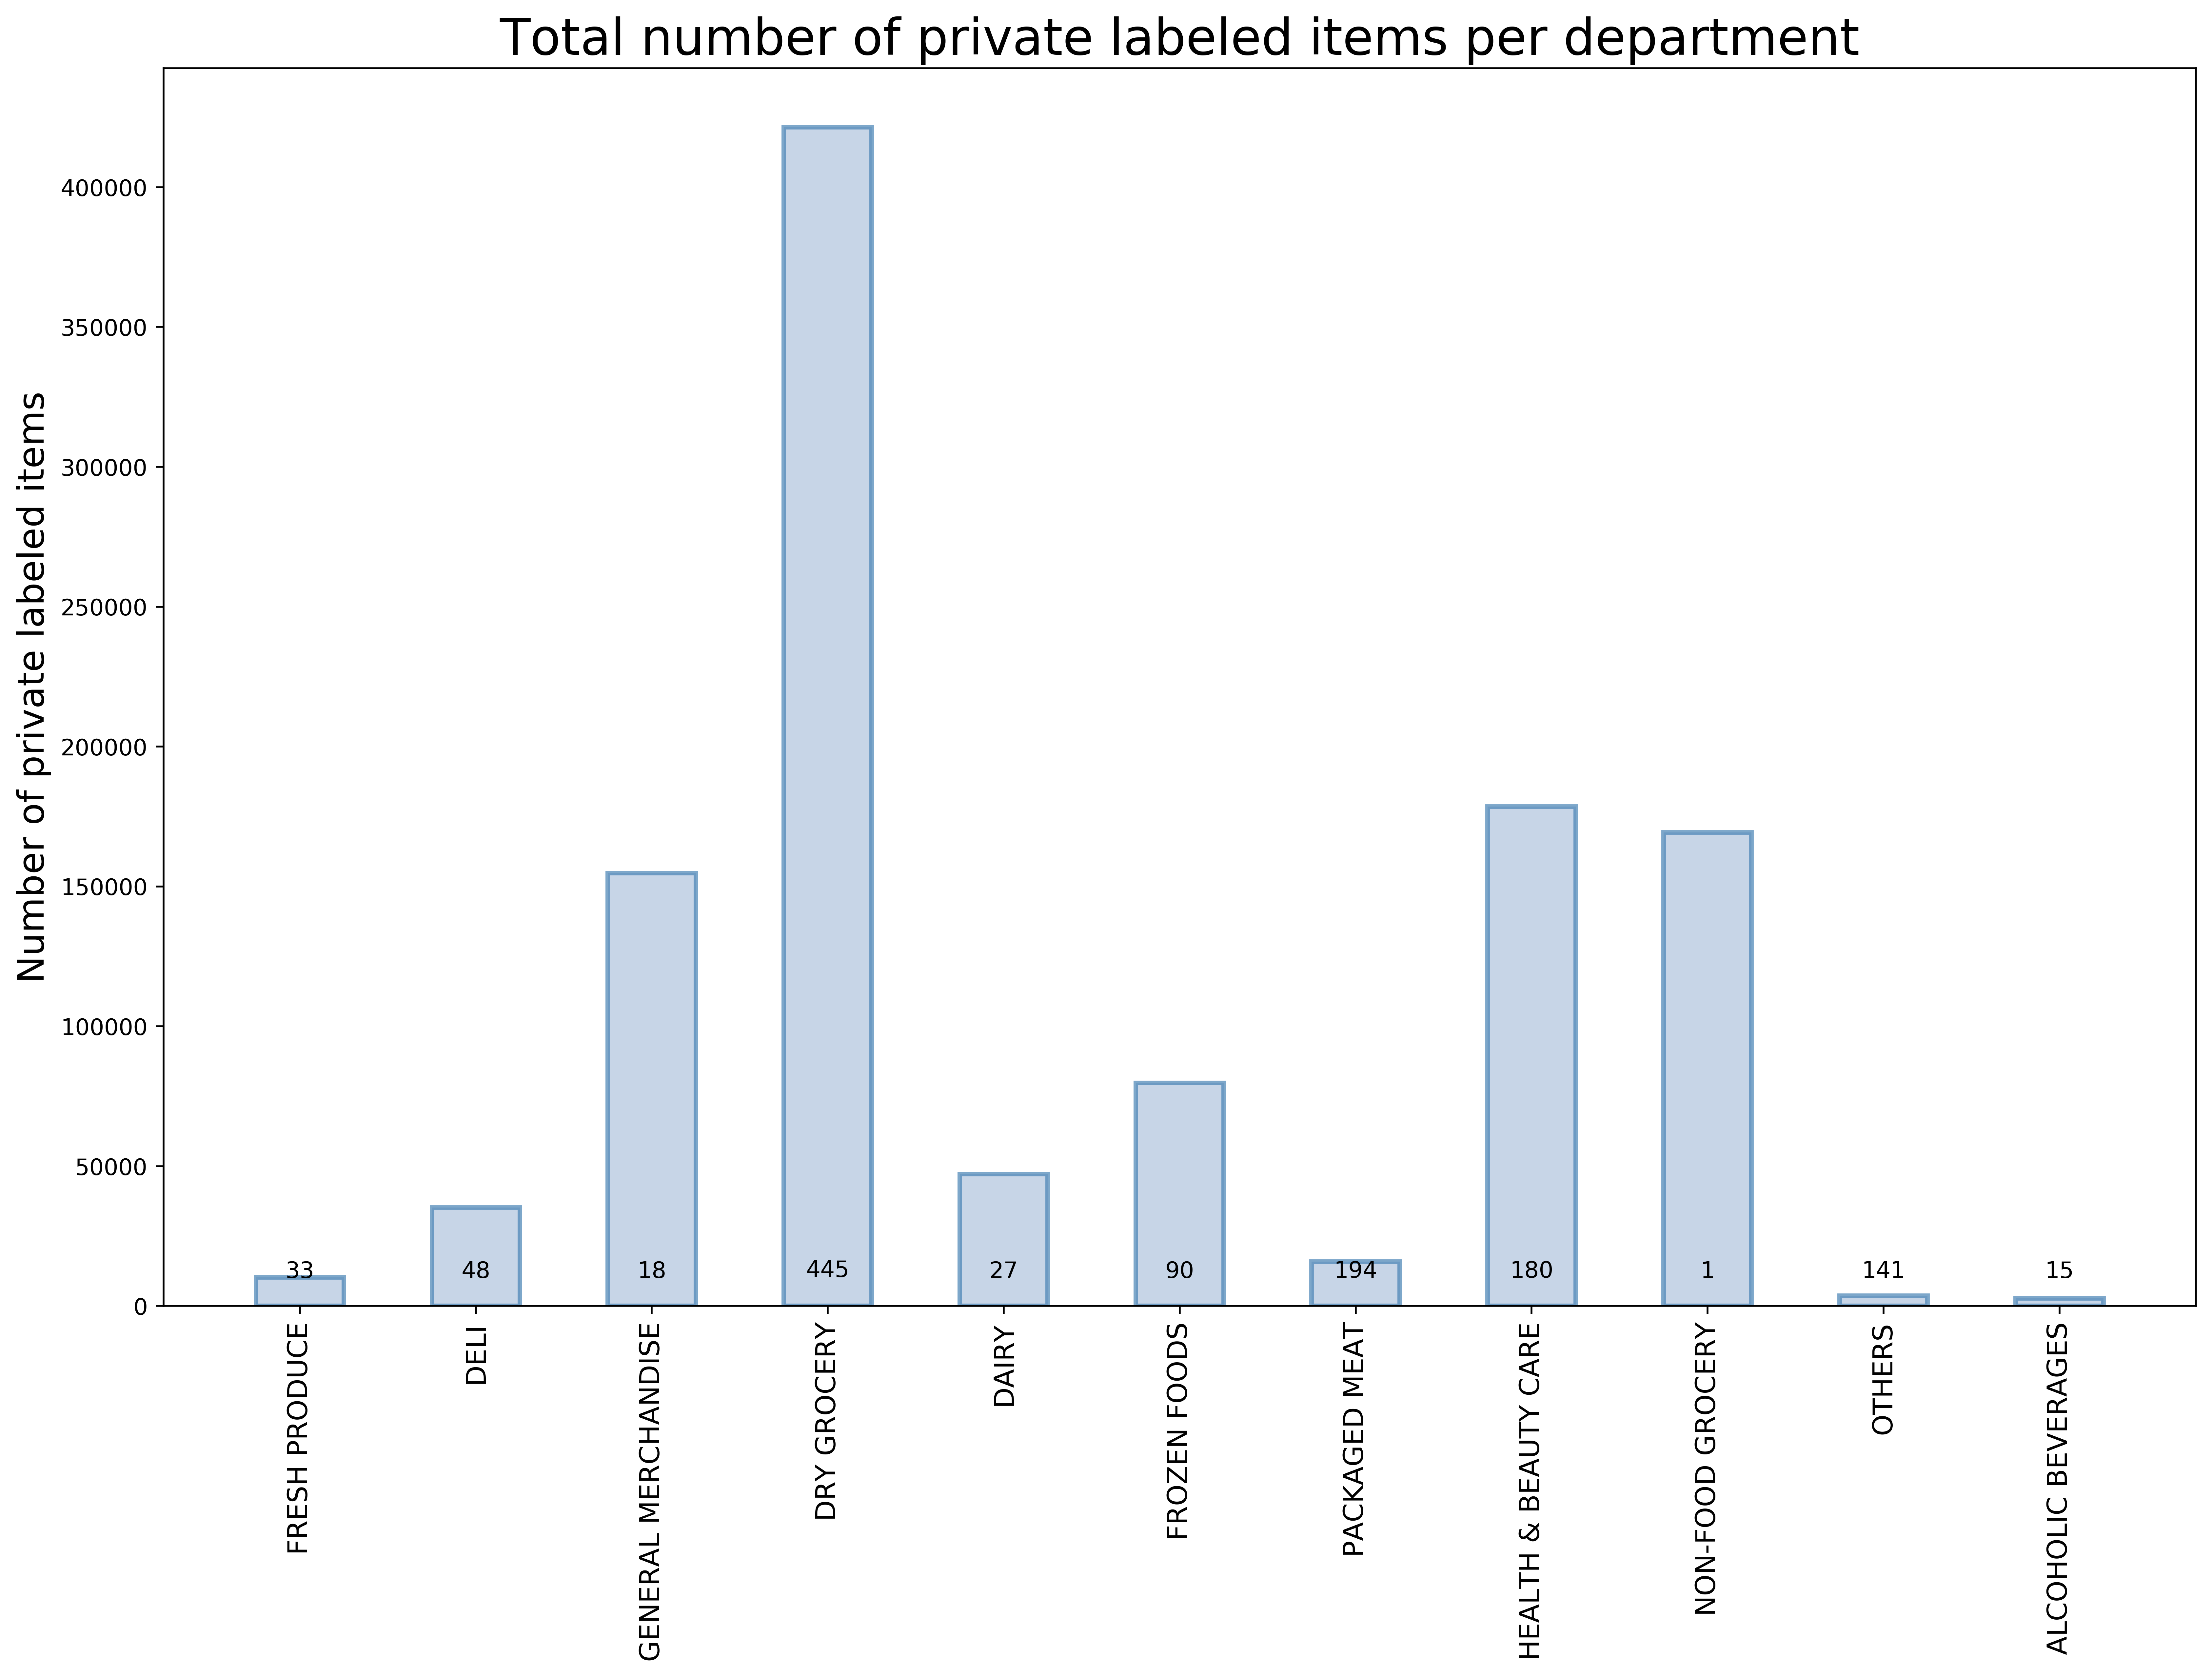

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.bar(private_labeled['category'], private_labeled['number'],
      edgecolor = 'steelblue',  linewidth = 2, color = 'lightsteelblue', alpha = 0.7,
       label = 'Single Retailer', width = 0.5)

# Title, Label, Ticks and Ylim
ax.set_title('Total number of private labeled items per department', fontdict={'size':22})
ax.set_xticklabels(private_labeled['category'], rotation = 90, fontsize=12)
ax.set_ylabel('Number of private labeled items', fontsize = 16)

# Annotate Text
for a, b in enumerate(private_labeled.index):
    ax.text(a, private_labeled['number'][b]+7000, private_labeled['number'][b], horizontalalignment='center', fontsize = 10)
plt.show()


In [18]:
(myresult)

,department,total_module_per_department
0,ALCOHOLIC BEVERAGES,33
1,DAIRY,48
2,DELI,18
3,DRY GROCERY,445
4,FRESH PRODUCE,27
5,FROZEN FOODS,90
6,GENERAL MERCHANDISE,194
7,HEALTH & BEAUTY CARE,180
8,MAGNET DATA,1
9,NON-FOOD GROCERY,141


## C.3.ii  Is the expenditure share in Private Labeled products constant across months?

In [6]:
## connecting mysql
sql_query = "with t1 as (select monthly, sum(total_price_paid_at_TC_prod_id) as total_monthly_spend from  private_labeled group by monthly),t2 as (select monthly, sum(total_price_paid_at_TC_prod_id) as total_monthly_labeled_spend from private_labeled where brand_at_prod_id regexp '(CTL BR)' group by monthly)select monthly, total_monthly_labeled_spend/total_monthly_spend as ratio_labeled from t1 inner join t2 using(monthly) order by monthly;"
mycursor = my_db.cursor()
mycursor.execute(sql_query)
monthly_ratio_labeled = mycursor.fetchall()
mycursor.close()

## rename colunmns
monthly_ratio_labeled = pd.DataFrame(monthly_ratio_labeled)
monthly_ratio_labeled.columns =['month', 'monthly_ratio_labeled']
## rest index
monthly_ratio_labeled.set_index(['month'])

ProgrammingError: 1146 (42S02): Table 'db_final.private_labeled' doesn't exist

### Draw the plot of 'Expenditure share in Private Labeled products'

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(12)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 500)
ax.plot(x, monthly_ratio_labeled['monthly_ratio_labeled'],
        marker = 'o', markersize = 15, linewidth=3, color = 'steelblue')


# Title, Label, Ticks and Ylim
ax.set_title('Expenditure share in Private Labeled products', fontdict={'size':22})
plt.xticks(x, monthly_ratio_labeled['month'], fontsize = 12)
ax.set_xlabel("Months", fontsize = 16)
ax.set_ylabel('Monthly spend ratio of labeled products',fontsize = 16)
plt.yticks(fontsize=12)

# Annotate Text
for a, b in enumerate(monthly_ratio_labeled.index):
    ax.text(a, monthly_ratio_labeled['monthly_ratio_labeled'][b]+0.0002, round(monthly_ratio_labeled['monthly_ratio_labeled'][b],3), 
            horizontalalignment='center', fontsize =11)
plt.show()

## C.3.iii  Report the average monthly expenditure on grocery. Study the % of private label share in their monthly expenditures.

### Draw the plot of '% of private label share in average monthly grocery expenditures'

In [ ]:
# Prepare data
income_all_grocery = pd.read_csv("grocery.csv", dtype = {'income_level' : str})

fig, ax = plt.subplots(figsize=(8,8), facecolor='white', dpi= 100)
ax.bar(income_all_grocery["income_level"], income_all_grocery["avg_spend_all"],width=0.35, edgecolor = 'mediumaquamarine', color = 'mediumaquamarine', alpha = 0.7, label = 'all grocery')

# Title, Label, Ticks 
ax.set_title('% of private label share in average monthly grocery expenditures', fontdict={'size':22}, y=1.05)
ax.set_xlabel("Income level", fontsize = 16)
ax.set_ylabel("Average monthly expenditure on grocery", fontsize = 16)
ax.set_xticklabels(income_all_grocery["income_level"],  fontsize = 12) 
plt.yticks(fontsize=12)
    
# Annotate Text
for a, b in enumerate(income_all_grocery.index):
    ax.text(a, income_all_grocery['avg_spend_all'][b]+1, round(income_all_grocery['avg_spend_all'][b],0), horizontalalignment='center',fontsize = 13)

# Draw for private label on the same graph

ax.bar(income_all_grocery["income_level"], income_all_grocery["avg_spend_private"],width=0.35, edgecolor = 'gold', color = 'gold', alpha = 1, label = 'private grocery')
# Annotate Text
for a, b in enumerate(income_all_grocery.index):
    ax.text(a, income_all_grocery['avg_spend_private'][b]+2, round(income_all_grocery['avg_spend_private'][b],0), horizontalalignment='center',fontsize = 13)
    ax.text(a, income_all_grocery['avg_spend_private'][b]/2, income_all_grocery['percentage'][b], horizontalalignment='center',fontsize = 13, c='brown')

ax.legend(labels=['all grocery','private grocery'], loc='upper left')

plt.show()